# Projet Algorithmique avancée, Thème : Récursivité
## Younes KORBI - 2 DNI 2
## ISITCom-Sousse, 2024/2025

### Fonction "diviser"

In [2]:
def diviser(echiquier, n, region):
    """
    Divise l'échiquier en quatre sous-échéquiers de taille n/2 x n/2
    echiquier : L'échiquier original
    n : Taille de l'échiquier
    region : La région à extraire
    Retour : Sous-échéquier correspondant à la région demandée
    """

    e = [[0 for _ in range(n // 2)] for _ in range(n // 2)]
    
    # Déterminer le point de départ en fonction de la région choisie
    match region:
        case 1:
            depart = (0, 0)
        case 2:
            depart = (0, n // 2)
        case 3:
            depart = (n // 2, 0)
        case 4:
            depart = (n // 2, n // 2)
    
    for i in range(n // 2):
        ligne = depart[0] + i
        for j in range(n // 2):
            colonne = depart[1] + j
            e[i][j] = echiquier[ligne][colonne]
            
    return e

### Fonction "L_shape_centrale"

In [3]:
def L_shape_centrale (n, region):
    """
    Définit les cases centrales de L-Shape en fonction de chaque région
    n : Taille de l'échiquier
    region : Région où se trouve la case défectueuse
    Retour: Coordonnées des trois cases formant le L-Shape
    """

    L_shape_centrale  = [
        ((n // 2) - 1, (n // 2) - 1), # Région 1
        ((n // 2) - 1, n // 2),       # Région 2
        ((n // 2), (n // 2) - 1),     # Région 3
        ((n // 2), (n // 2))          # Région 4
    ]
    del L_shape_centrale [region - 1]
    return L_shape_centrale 

### Fonction "assembler"

In [4]:
def assembler(e1, e2, e3, e4, n):
    """
    Assemble les quatre sous-échéquiers pour reformer un échiquier complet
    e1, e2, e3, e4 : Les quatre sous-échéquiers
    n : Taille de l'échiquier complet
    Retour : Echiquier assemblé
    """

    r = [[0 for _ in range(n)] for _ in range(n)]

    for i in range(n // 2):
        for j in range(n // 2):
            r[i][j] = e1[i][j]

    for i in range(n // 2):
        for j in range(n // 2, n):
            r[i][j] = e2[i][j - (n // 2)]

    for i in range(n // 2, n):
        for j in range(n // 2):
            r[i][j] = e3[i - (n // 2)][j]

    for i in range(n // 2, n):
        for j in range(n // 2, n):
            r[i][j] = e4[i - (n // 2)][j - (n // 2)]

    return r

### Fonction "carrelage"

In [5]:
def carrelage(echiquier, n, CASE_DEF, nb=1):
    """
    Fonction récursif de l'échiquier
    echiquier : Echiquier à carreler
    n : Taille de l'échiquier
    CASE_DEF : Coordonnées de la case défectueuse
    Retour : Echiquier carrelé
    """
    if n == 2:
        # Problème simple
        for i, j in [(0, 0), (0, 1), (1, 0), (1, 1)]:
            if (i, j) != CASE_DEF:
                echiquier[i][j] = nb
        solution = echiquier
    else: 
        # Problème difficile
        # Diviser
        e1 = diviser(echiquier, n, region=1)
        e2 = diviser(echiquier, n, region=2)
        e3 = diviser(echiquier, n, region=3)
        e4 = diviser(echiquier, n, region=4)

        # Trouver  le L-Shape centrale et définir les cases défectueuses pour chaque sous-échiquier
        if (CASE_DEF[0] <= (n // 2) - 1) and (CASE_DEF[1] <= (n // 2) - 1):
            # La case défectueuse est dans la région 1
            L_Shape = L_shape_centrale(n, region=1)
            e1_case_def = CASE_DEF
            e2_case_def = (L_Shape[0][0], L_Shape[0][1] - (n // 2))
            e3_case_def = (L_Shape[1][0] - (n // 2), L_Shape[1][1])
            e4_case_def = (L_Shape[2][0] - (n // 2), L_Shape[2][1] - (n // 2))

        elif (CASE_DEF[0] <= (n // 2) - 1) and (CASE_DEF[1] >= (n // 2)):
            # La case défectueuse est dans la région 2
            L_Shape = L_shape_centrale(n, region=2)
            e1_case_def = (L_Shape[0][0], L_Shape[0][1])
            e2_case_def = (CASE_DEF[0], CASE_DEF[1] - (n // 2))
            e3_case_def = (L_Shape[1][0] - (n // 2), L_Shape[1][1])
            e4_case_def = (L_Shape[2][0] - (n // 2), L_Shape[2][1] - (n // 2))

        elif (CASE_DEF[0] >= (n // 2)) and (CASE_DEF[1] <= (n // 2) - 1):
            # La case défectueuse est dans la région 3
            L_Shape = L_shape_centrale(n, region=3)
            e1_case_def = (L_Shape[0][0], L_Shape[0][1])
            e2_case_def = (L_Shape[1][0], L_Shape[1][1] - (n // 2))
            e3_case_def = (CASE_DEF[0] - (n // 2), CASE_DEF[1])
            e4_case_def = (L_Shape[2][0] - (n // 2), L_Shape[2][1] - (n // 2))

        else:
            # La case défectueuse est dans la région 4
            L_Shape = L_shape_centrale(n, region=4) # L_Shape = [  [l1, c1] , [l2, c2] , [l3, c3] ]
            e1_case_def = ( L_Shape[0][0], L_Shape[0][1] )
            e2_case_def = (L_Shape[1][0], L_Shape[1][1] - (n // 2))
            e3_case_def = (L_Shape[2][0] - (n // 2), L_Shape[2][1])
            e4_case_def = (CASE_DEF[0] - (n // 2), CASE_DEF[1] - (n // 2))

        # Régner
        s1, nb = carrelage(e1, n // 2, e1_case_def, nb)
        s2, nb = carrelage(e2, n // 2, e2_case_def, nb+1)
        s3, nb = carrelage(e3, n // 2, e3_case_def, nb+1)
        s4, nb = carrelage(e4, n // 2, e4_case_def, nb+1)

        # Assembler
        solution = assembler(s1, s2, s3, s4, n)

        # Marquer  L-Shape centrale avec des valeurs uniques
        nb = nb+1
        for i in L_Shape:
            solution[i[0]][i[1]] =  nb

    return solution, nb

### Le programme principale


INPUT
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0 999  0  0  0

OUTPUT
 1  1  2  2  6  6  7  7
 1  5  5  2  6 10 10  7
 3  5  4  4  8  8 10  9
 3  3  4 21 21  8  9  9
11 11 12 21 16 16 17 17
11 15 12 12 16 20 20 17
13 15 15 14 18 18 20 19
13 13 14 14 999 18 19 19


Nombre de L-Shape : 21



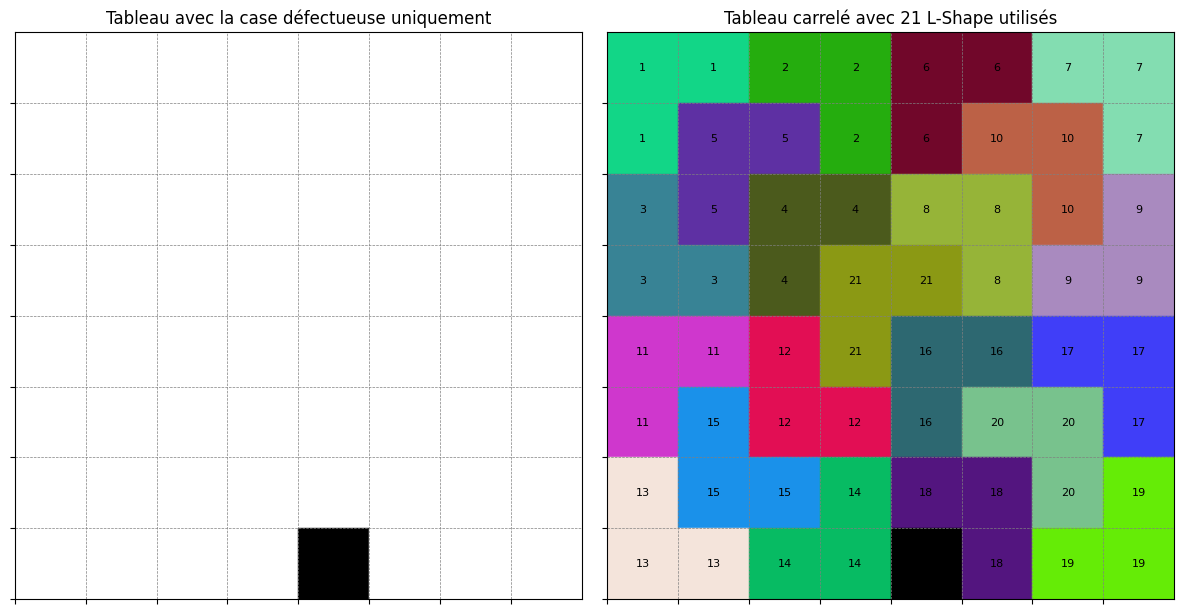

In [6]:
    import matplotlib.pyplot as plt
    n = 8
    CASE_DEF = (7, 4)
    echiquier = [[0 for _ in range(n)] for _ in range(n)]
    
    # Marquer la case défectueuse
    echiquier[CASE_DEF[0]][CASE_DEF[1]] = 999  
    
    # Affichage de l'entrée
    print("\nINPUT")
    for ligne in echiquier:
        print(" ".join(f"{case:2}" for case in ligne))
    
    echiquier_carrele, nb = carrelage(echiquier, n, CASE_DEF)
    
    # Affichage de la sortie
    print("\nOUTPUT")
    for ligne in echiquier_carrele:
        print(" ".join(f"{case:2}" for case in ligne))
    print("")
    
    print(f"\nNombre de L-Shape : {nb}\n")
    
    
    # Affichage dans Matplotlib
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Première sous-figure : Tableau avec cases blanches et case défectueuse
    ax = axes[0]
    for i in range(n):
        for j in range(n):
            if (i, j) == CASE_DEF:  # Case défectueuse
                color = "black"
            else:
                color = "white"

            # Dessiner un carré coloré
            rect = plt.Rectangle((j, n - i - 1), 1, 1, color=color)
            ax.add_patch(rect)

    # Configurer l'affichage de la première sous-figure
    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    ax.set_xticks(range(n))
    ax.set_yticks(range(n))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    ax.grid(color="gray", linestyle='--', linewidth=0.5)
    ax.set_title("Tableau avec la case défectueuse uniquement")

    # Deuxième sous-figure : Tableau carrelé
    ax2 = axes[1]
    for i in range(n):
        for j in range(n):
            value = echiquier_carrele[i][j]
            if value == 999:  # Case défectueuse
                color = "black"
                text_color = "white"
            else:
                # Génère une couleur basée sur la valeur
                color = f"#{(value * 1234567 % 0xFFFFFF):06x}"[:7]
                text_color = "black"

            # Dessiner un carré coloré
            rect = plt.Rectangle((j, n - i - 1), 1, 1, color=color)
            ax2.add_patch(rect)

            # Ajouter le texte pour les cases normales
            if value != 999:
                ax2.text(
                    j + 0.5, n - i - 0.5, str(value),
                    color=text_color, ha="center", va="center", fontsize=8
                )

    # Configurer l'affichage de la deuxième sous-figure
    ax2.set_xlim(0, n)
    ax2.set_ylim(0, n)
    ax2.set_xticks(range(n))
    ax2.set_yticks(range(n))
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])
    ax2.set_aspect('equal')
    ax2.grid(color="gray", linestyle='--', linewidth=0.5)
    ax2.set_title(f"Tableau carrelé avec {nb} L-Shape utilisés")

    # Afficher les deux figures côte à côte
    plt.tight_layout()
    plt.show()
